# Trabalho 3

Professor: Grazione Souza

- Nome do aluno: Pedro Henrique Couto Silva;
- Matrícula: $202020466311$

- Nome do aluno : Vinicius Carvalho Monnerat Bandeira;
- Matrícula: $202020466711$

O estudo aqui proposto pode ser encontrado em https://github.com/ViniciusCMB/Metodos_Num.git


------------------------

## Bibliotecas

In [188]:
import numpy as np
import matplotlib.pyplot as plt

## Função para resolver o problema

In [189]:
def funcao_C(T, Nx, Lx, alpha, k, dt, CE):
    # Inicializando a matriz de coeficientes e o vetor de solução
    dx = Lx / Nx # passo no espaço
    Nt = int(T / dt)
    A = np.zeros((Nx, Nx))
    C = np.zeros(Nx)

    # Preenchendo a matriz de coeficientes A
    for i in range(1, Nx-1):
        A[i, i-1] = -alpha / dx**2
        A[i, i] = 1 / dt + 2 * alpha / dx**2 + k
        A[i, i+1] = -alpha / dx**2

    # Condições de contorno
    A[0, 0] = 1.0
    A[-1, -1] = 1.0
    A[-1, -2] = -1.0

    # Inicializando a solução
    C[0] = CE

    # Loop no tempo
    for n in range(Nt):
        # Vetor de termos independentes
        b = C / dt
        b[0] = CE
        b[-1] = 0.0

        # Resolvendo o sistema linear
        C = np.linalg.solve(A, b)

    x = np.linspace(0, Lx, Nx)

    return C, x

## Parâmetros de Entrada:

- T: Tempo total de simulação.
- Nx: Número de pontos no espaço.
- Lx: Comprimento do domínio.
- alpha: Constante de difusão.
- k: Constante de reação.
- dt: Passo no tempo.
- CE: Condição de contorno em x = 0.

## Inicialização:

- dx: Passo no espaço, calculado dividindo o comprimento do domínio pelo número de pontos no espaço.
- Nt: Número de passos no tempo, calculado dividindo o tempo total pelo passo no tempo.
- A: Matriz de coeficientes, inicializada com zeros.
- C: Vetor de solução, inicializado com zeros.
- Preenchimento da Matriz de Coeficientes A:
-- Para cada ponto no espaço (exceto os extremos), a matriz A é preenchida com os coeficientes baseados na equação de difusão.
A[i, i-1], A[i, i] e A[i, i+1] são preenchidos com valores que dependem de alpha, dx, dt e k.

## Condições de Contorno:

As condições de contorno são aplicadas nos extremos da matriz A.
Inicialização da Solução:

O vetor C é inicializado com a condição de contorno em x = 0.

## Loop no Tempo:

Para cada passo no tempo, o vetor de termos independentes b é calculado.
A condição de contorno é aplicada ao vetor b.
O sistema linear A * C = b é resolvido para obter a nova solução C.
Retorno:

A função retorna o vetor de solução C e o vetor de posições x.

## Função funcao_C:
De maneira geral função resolve uma equação de difusão-reação em uma dimensão usando o método das diferenças finitas. Ela calcula a distribuição de concentração C ao longo do domínio Lx após um tempo T, considerando as condições de contorno e os parâmetros fornecidos.

## Parâmetros para a solução

In [190]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 1.0  # tempo total

# Condições de contorno
CE = 5  # valor de C em x = 0

## Obtém a solução e o domnínio

In [191]:
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)

C

array([5.00000000e+00, 4.69175420e+00, 4.38950023e+00, 4.09421591e+00,
       3.80684657e+00, 3.52828751e+00, 3.25936794e+00, 3.00083669e+00,
       2.75335012e+00, 2.51746236e+00, 2.29361820e+00, 2.08214858e+00,
       1.88326871e+00, 1.69707882e+00, 1.52356726e+00, 1.36261576e+00,
       1.21400672e+00, 1.07743190e+00, 9.52502549e-01, 8.38760298e-01,
       7.35688660e-01, 6.42724732e-01, 5.59270791e-01, 4.84705512e-01,
       4.18394571e-01, 3.59700422e-01, 3.07991120e-01, 2.62648067e-01,
       2.23072623e-01, 1.88691572e-01, 1.58961439e-01, 1.33371722e-01,
       1.11447097e-01, 9.27486941e-02, 7.68745408e-02, 6.34592891e-02,
       5.21733389e-02, 4.27214693e-02, 3.48410896e-02, 2.83002084e-02,
       2.28952145e-02, 1.84485495e-02, 1.48063435e-02, 1.18360706e-02,
       9.42427202e-03, 7.47438328e-03, 5.90469232e-03, 4.64644614e-03,
       3.64211726e-03, 2.84383398e-03, 2.21197401e-03, 1.71391651e-03,
       1.32294498e-03, 1.01729097e-03, 7.79307559e-04, 5.94760406e-04,
      

## Plota o resultado obtido

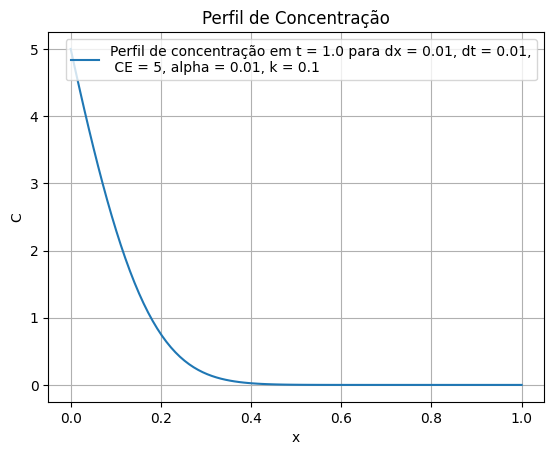

In [192]:
# Plotando o resultado
plt.plot(x, C, label=f'Perfil de concentração em t = {T} para dx = {Lx / (Nx)}, dt = {dt},\n CE = {CE}, alpha = {alpha}, k = {k}')
plt.xlabel('x')
plt.ylabel('C')
plt.grid()
titulo = 'Perfil de Concentração'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

---------------------------

## Estudando valores para $Nx = \{10, 100, 1000\}$ com $Lx = 1, \alpha = 0.01, k = 0.1, dt = 0.01,$ e tempo de simulação $T = 1.0$ 


O que se espera de valores crescentes de Nx

Valores crescentes de \( Nx \) representam um aumento no número de pontos no espaço. Isso significa que a discretização do domínio \( Lx \) está se tornando mais fina. Em termos de concentração \( C \), espera-se que:

- A solução \( C \) se torne mais precisa e suave, capturando melhor as variações ao longo do domínio.
- A resolução espacial aumentada permita uma melhor representação dos gradientes de concentração.
- A estabilidade e a precisão do método numérico melhorem, resultando em perfis de concentração mais detalhados e realistas.

Em resumo, com valores crescentes de \( Nx \), a discretização espacial se torna mais refinada, levando a uma solução mais precisa e detalhada da concentração ao longo do domínio.

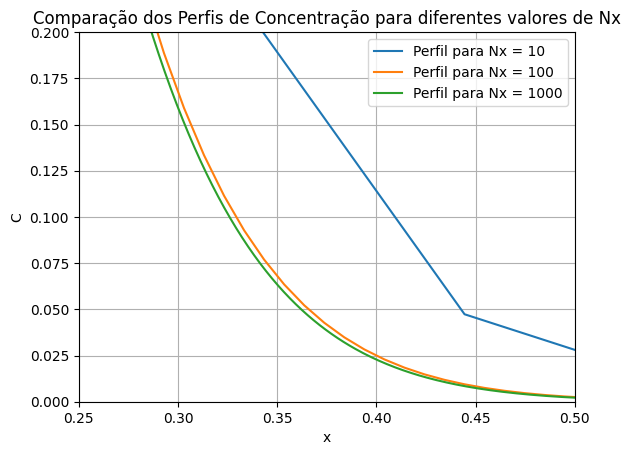

In [193]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 10  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 1.0  # tempo total

# Condições de contorno
CE = 5  # valor de C em x = 0

# Resultado
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para Nx = {Nx}')

Nx = 100  # número de pontos no espaço
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para Nx = {Nx}')

Nx = 1000  # número de pontos no espaço
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para Nx = {Nx}')

# Plotando o resultado
plt.xlabel('x')
plt.ylabel('C')
plt.axis([0.25, 0.5, 0, 0.2])
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de Nx'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

Como é possível observar, valores maiores para Nx se aproximam melhor de um resultado consistente.

------------------------

## Estudando valores para $k = \{0.1, 1, 10\}$ com $Lx = 1, Nx = 100, \alpha = 0.01, dt = 0.01,$ e tempo de simulação $T = 1.0$ 

O que se espera de valores crescentes de k

Valores crescentes de \( k \) representam um aumento na constante de reação. Isso significa que a taxa de reação química está aumentando. Em termos de concentração \( C \), espera-se que:

- A concentração \( C \) diminua mais rapidamente ao longo do domínio \( Lx \).
- A solução \( C \) se estabilize em valores mais baixos conforme \( k \) aumenta.
- A difusão terá menos influência comparada à reação, resultando em perfis de concentração mais acentuados.

Em resumo, com valores crescentes de \( k \), a reação domina o processo, levando a uma redução mais rápida da concentração ao longo do tempo e do espaço.

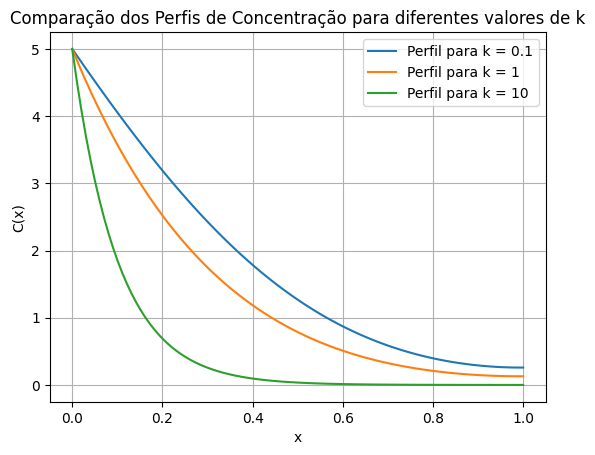

In [194]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.1  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 1.0  # tempo total

# Condições de contorno
CE = 5  # valor de C em x = 0

# Resultado
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para k = {k}')

k = 1  # constante k
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para k = {k}')

k = 10 # constante k
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para k = {k}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de k'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

Como é possível observar, valores crescentes de k tornam a reação mais acentuada.

----------------


## Estudando valores para $\alpha = \{0.01, 0.1, 1, 10\}$ com $Lx = 1, Nx = 100, k = 0.1, dt = 0.01,$ e tempo de simulação $T = 1.0$ 

Valores crescentes de \( $\alpha$ \) representam um aumento na constante de difusão. Isso significa que a taxa de difusão está aumentando. Em termos de concentração \( C \), espera-se que:

- A concentração \( C \) se espalhe mais rapidamente ao longo do domínio \( Lx \).
- A solução \( C \) se torne mais uniforme ao longo do domínio conforme \( $\alpha$ \) aumenta.
- A influência da difusão aumentada resulte em perfis de concentração mais suaves e menos acentuados.

Em resumo, com valores crescentes de \( $\alpha$ \), a difusão domina o processo, levando a uma distribuição mais uniforme da concentração ao longo do tempo e do espaço.

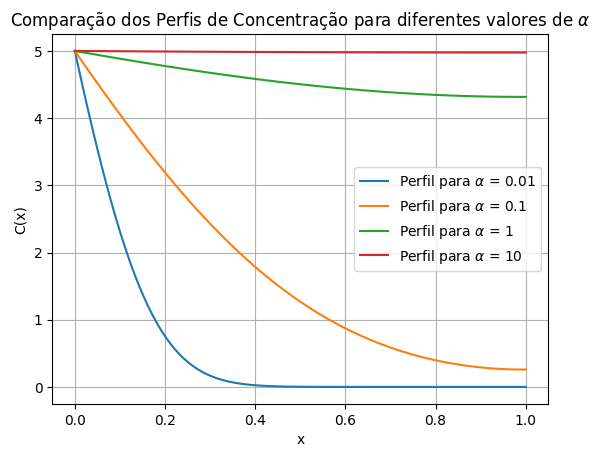

In [195]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 1.0  # tempo total

# Condições de contorno
CE = 5  # valor de C em x = 0

# Resultado
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para $\\alpha$ = {alpha}')

alpha = 0.1  # constante alpha
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para $\\alpha$ = {alpha}')

alpha = 1  # constante alpha
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para $\\alpha$ = {alpha}')

alpha = 10  # constante alpha
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para $\\alpha$ = {alpha}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de $\\alpha$'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

É possível observar que maiores valores de $\alpha$ difundem mais rapidamente a concentração como esperado.

--------------

## Concentração na fronteira esquerda do domínio

A condição de contorno \( CE \) influencia diretamente a concentração \( C \) no ponto \( x = 0 \) ao longo do tempo. Especificamente:

- **Valor Inicial de Concentração**: \( CE \) define o valor inicial da concentração no ponto \( x = 0 \). Valores maiores de \( CE \) resultam em uma concentração inicial mais alta nesse ponto.
- **Distribuição de Concentração**: A concentração \( C \) ao longo do domínio \( Lx \) será afetada pela condição de contorno \( CE \). Um \( CE \) maior pode levar a uma concentração mais alta ao longo do domínio, dependendo dos parâmetros de difusão (\( $\alpha$ \)) e reação (\( k \)).
- **Perfis de Concentração**: Diferentes valores de \( CE \) resultam em diferentes perfis de concentração ao longo do domínio. Isso pode ser observado nos gráficos de concentração, onde perfis com \( CE \) maiores tendem a ter valores de concentração mais altos.

Em resumo, \( CE \) é um parâmetro crucial que define a condição de contorno no ponto \( x = 0 \) e influencia a distribuição e os perfis de concentração ao longo do domínio.

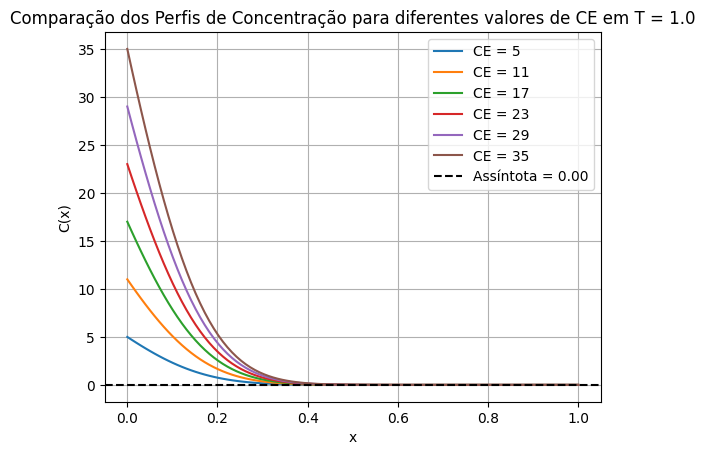

In [196]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 1.0  # tempo total

# Condições de contorno
CE_values = np.arange(5, 36, 6)  # valor de C em x = 0

valores_finais = []

for CE in CE_values:
    C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
    plt.plot(x, C, label=f'CE = {CE}')
    valores_finais.append(C[-1])

# Calculando a média dos valores finais
media_valores_finais = np.mean(valores_finais)

# Plotando a assíntota
plt.axhline(y=media_valores_finais, color='black', linestyle='--', label=f'Assíntota = {media_valores_finais:.2f}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de CE em T = 1.0'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

Observa-se que para todas as concentrações simuladas, a tendência era uma concentração 0 na fronteira direita do domínio. Entretanto, ao simular um intervalo maior de tempo, o comportamento muda.

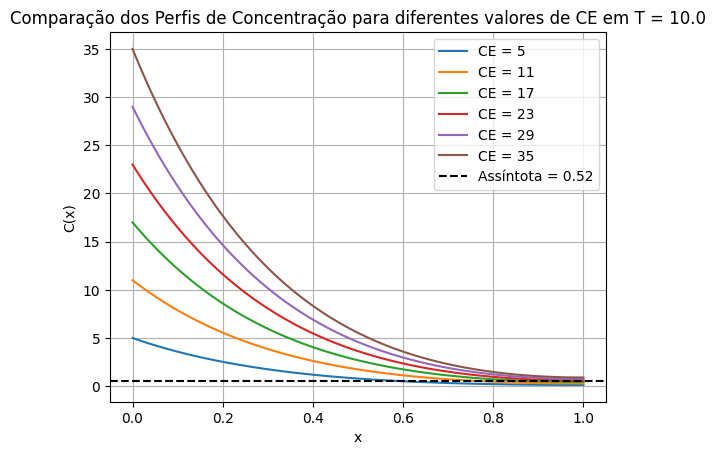

In [197]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 10.0  # tempo total

# Condições de contorno
CE_values = np.arange(5, 36, 6)  # valor de C em x = 0

valores_finais = []

for CE in CE_values:
    C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
    plt.plot(x, C, label=f'CE = {CE}')
    valores_finais.append(C[-1])

# Calculando a média dos valores finais
media_valores_finais = np.mean(valores_finais)

# Plotando a assíntota
plt.axhline(y=media_valores_finais, color='black', linestyle='--', label=f'Assíntota = {media_valores_finais:.2f}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de CE em T = 10.0'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

Isso se deve pois a tendencia é que após determinado tempo, cada condição de \( CE \) se torne um valor constante ao longo do domínio.

----------------

## Tempo de simulação

O tempo de simulação \( T \) influencia diretamente a evolução da concentração \( C \) ao longo do domínio \( Lx \). Especificamente:

- **Evolução Temporal**: À medida que \( T \) aumenta, a concentração \( C \) tem mais tempo para evoluir, permitindo que os efeitos da difusão e da reação se manifestem mais plenamente.
- **Distribuição de Concentração**: Para tempos \( T \) maiores, a concentração \( C \) tende a se estabilizar, atingindo um estado estacionário onde as mudanças ao longo do tempo são mínimas.
- **Perfis de Concentração**: Diferentes valores de \( T \) resultam em diferentes perfis de concentração ao longo do domínio. Perfis para tempos menores podem mostrar variações mais acentuadas, enquanto perfis para tempos maiores tendem a ser mais suaves e uniformes.

Em resumo, o tempo de simulação \( T \) é um parâmetro crucial que define a duração da simulação e influencia a distribuição e os perfis de concentração ao longo do domínio.

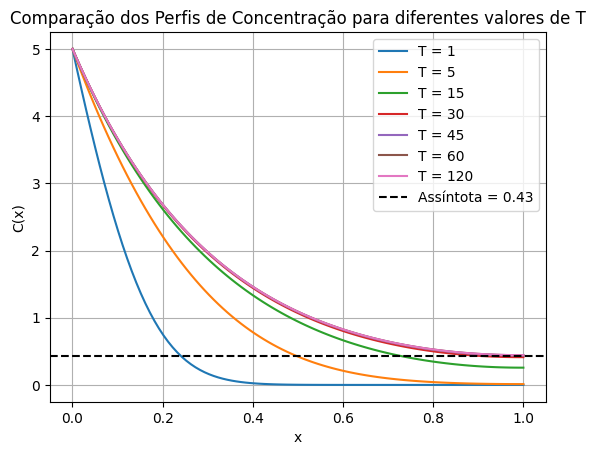

In [198]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo

# Condições de contorno
CE = 5  # valor de C em x = 0

# Condições de contorno
T_values = [1, 5, 15, 30, 45, 60, 120]  # valores de T variando de 1 até 60

# Valores de T para calcular a média dos valores finais
T_values_assintota = [30, 45, 60, 120]

valores_finais = []

# Plotando os perfis de concentração para os valores de T
for T in T_values:
    C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
    plt.plot(x, C, label=f'T = {T}')
    if T in T_values_assintota:
        valores_finais.append(C[-1])

# Calculando a média dos valores finais
media_valores_finais = np.mean(valores_finais)

# Plotando a assíntota
plt.axhline(y=media_valores_finais, color='black', linestyle='--', label=f'Assíntota = {media_valores_finais:.2f}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de T'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

A assíntota \( y = 0.43 \) observada ocorre porque, após um tempo suficiente, a concentração \( C \) ao longo do domínio se estabiliza em um valor médio constante devido ao equilíbrio entre difusão e reação.